## Initial sRRR exploration on Purkinje cell firing rates and locomotion

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import warnings

from sparseRRR import elastic_rrr, elastic_rrr_bootstrap, elastic_rrr_cv, dimensionality, bibiplot, plot_cv_results, relaxed_elastic_rrr
from sklearn.exceptions import ConvergenceWarning

In [2]:
def preprocess(data):
    X_linear = data['Linear mix']
    X_nonlinear = data['Nonlinear only']
    X_full = data['Full mixing']
    X_linear = X_linear - np.mean(X_linear, axis=0)
    X_linear = X_linear / np.std(X_linear, axis=0)
    X_nonlinear = X_nonlinear - np.mean(X_nonlinear, axis=0)
    X_nonlinear = X_nonlinear / np.std(X_nonlinear, axis=0)
    X_full = X_full - np.mean(X_full, axis=0)
    X_full = X_full / np.std(X_full, axis=0)

    Y = data['Locomotion']
    Y = Y - np.mean(Y, axis=0)
    Y = Y / np.std(Y, axis=0)
    
    return X_linear, X_nonlinear, X_full, Y

In [3]:
data = pickle.load(open('../data/purkinje_sRRR.pickle', 'rb'))

X_linear, X_nonlinear, X_full, Y = preprocess(data)
cell_names = data['cell_names']
locomotion_names = data['locomotion_names']

print('Shape of X_linear:', X_linear.shape, 'Shape of X_nonlinear:', X_nonlinear.shape, 'Shape of X_full:', X_full.shape, 'Shape of Y:', Y.shape)

Shape of X_linear: (1816281, 91) Shape of X_nonlinear: (1816281, 91) Shape of X_full: (1816281, 91) Shape of Y: (1816281, 16)


It is a lot of timepoints, so let us play around with reduced data set sizes.

In [4]:
slice = np.linspace(0, 10000, 10000, dtype=int)
slice

array([    0,     1,     2, ...,  9997,  9998, 10000])

### Linear + non-linear

In [5]:
w,v = elastic_rrr(X_full[slice,:], Y[slice,:], rank=2, alpha=.4, l1_ratio=1)

print('\nNeurons selected: {}'.format(np.sum(w[:,0]!=0)))
print(cell_names[w[:,0]!=0])


Neurons selected: 10
['MC3808_S7' 'MC3810_S9' 'MC5003_S17' 'MC5003_S21' 'MC5003_S25'
 'MC5003_S28' 'MC5005_S14' 'MC5005_S6' 'MC6001_S13' 'MC6001_S5']


In [7]:
w,v = relaxed_elastic_rrr(X_full[slice,:], Y[slice,:], rank=2, alpha=.4, l1_ratio=1)

print('\nNeurons selected: {}'.format(np.sum(w[:,0]!=0)))
print(cell_names[w[:,0]!=0])


Neurons selected: 10
['MC3808_S7' 'MC3810_S9' 'MC5003_S17' 'MC5003_S21' 'MC5003_S25'
 'MC5003_S28' 'MC5005_S14' 'MC5005_S6' 'MC6001_S13' 'MC6001_S5']


In [18]:
w[:,0]!=0

array([False, False, False, False, False, False,  True, False, False,
        True, False, False, False, False, False,  True,  True, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False,  True, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
        True, False, False,  True, False, False, False, False, False,
       False])

In [19]:
(w[:,0]!=0).shape

(91,)

### Non-linear

In [20]:
w,v = relaxed_elastic_rrr(X_nonlinear[slice,:], Y[slice,:], rank=2, alpha=.516, l1_ratio=1)

print('\nNeurons selected: {}'.format(np.sum(w[:,0]!=0)))
print(cell_names[w[:,0]!=0])


Neurons selected: 10
['MC5003_S1' 'MC5003_S30' 'MC5003_S8' 'MC5005_S2' 'MC5005_S6' 'MC5005_S9'
 'MC5006_S2' 'MC6001_S3' 'MC6001_S7' 'MC6002_S2']


### Linear

In [34]:
w,v = relaxed_elastic_rrr(X_linear[slice,:], Y[slice,:], rank=2, alpha=.54, l1_ratio=1)

print('\nNeurons selected: {}'.format(np.sum(w[:,0]!=0)))
print(cell_names[w[:,0]!=0])


Neurons selected: 10
['MC3808_S2' 'MC3808_S7' 'MC4017_S10' 'MC5003_S1' 'MC5003_S21'
 'MC5003_S25' 'MC5003_S28' 'MC5005_S14' 'MC5005_S5' 'MC6001_S5']


In [ ]:
w,v = relaxed_elastic_rrr(X_linear[slice,:], Y[slice,:], rank=3, alpha=.615, l1_ratio=1)
print('\nNeurons selected: {}'.format(np.sum(w[:,0]!=0)))
print(cell_names[w[:,0]!=0])


Neurons selected: 10
['MC3808_S2' 'MC3808_S7' 'MC3810_S7' 'MC5003_S1' 'MC5003_S21' 'MC5003_S25'
 'MC5003_S28' 'MC5005_S14' 'MC5005_S5' 'MC6001_S5']


Notice that here we changed the regularization strength $\alpha$ to select 10 neurons each time.

How well are we predicting, on the training set, different behaviorial variables (locomotion)?

In [35]:
for i in range(Y.shape[1]):
    r2=1-np.sum((Y[slice,i]-(X_linear@w@v.T)[slice,i])**2)/np.sum(Y[slice,i]**2)
    print(locomotion_names[i], ': ', r2)

X-p FR :  0.7799935668855167
X-p HR :  0.6656813108039387
X-p FL :  0.7453241518570723
X-p HL :  0.6145850440391216
X-s FR :  0.4693619960512355
X-s HR :  0.41365666842615434
X-s FL :  0.43856944134436615
X-s HL :  0.3294118227980698
Z-p FR :  0.7094433625706704
Z-p HR :  0.3690347514346062
Z-p FL :  0.651833577903387
Z-p HL :  0.04895967960301917
Z-s FR :  0.24880157253272128
Z-s HR :  0.062098233971275785
Z-s FL :  0.2180159006423208
Z-s HL :  0.002811100879471562


Text(0.5, 1.0, 'Sorted row l2-norms of $W$')

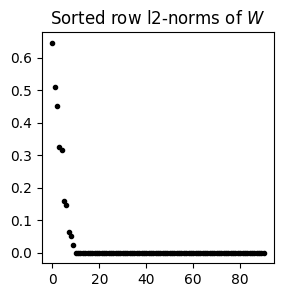

In [6]:
fig, ax = plt.subplots(1,1,figsize=(3,3))
ax.plot(np.sort(np.linalg.norm(w, axis=1))[::-1], '.', color='black')
ax.set_title(r'Sorted row l2-norms of $W$')

Text(0.5, 1.0, 'Sorted row l2-norms of $W$')

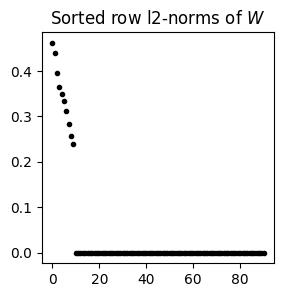

In [8]:
fig, ax = plt.subplots(1,1,figsize=(3,3))
ax.plot(np.sort(np.linalg.norm(w, axis=1))[::-1], '.', color='black')
ax.set_title(r'Sorted row l2-norms of $W$')

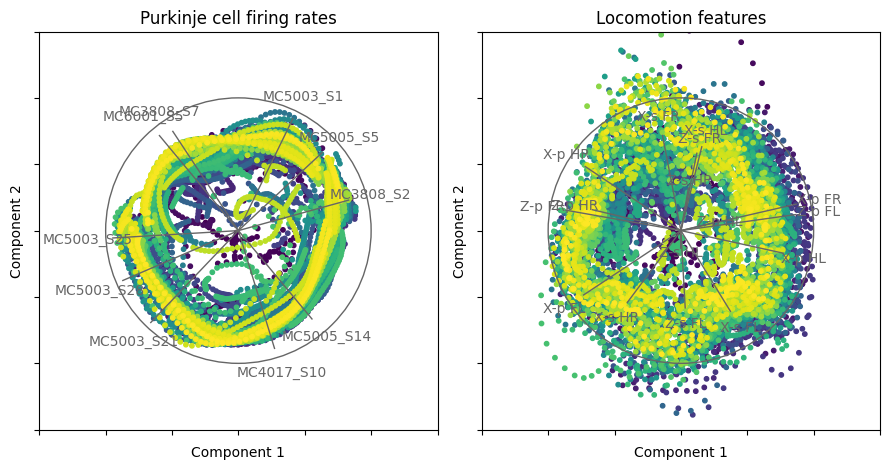

In [38]:
# Pick linear or nonlinear or full with their trained weights
bibiplot(X_linear[slice,:], Y[slice,:], w, v, 
         titles = ['Purkinje cell firing rates', 'Locomotion features'],
         YdimsNames = np.array(locomotion_names), 
         XdimsNames = cell_names
         )

In [64]:
slice = np.linspace(0, 10000, 10000, dtype=int)

In [39]:
alphas = np.concatenate((np.arange(.1,1.01,.1), np.arange(2,7)))
l1_ratios = np.array([1])

cvResults_across_datasets = []

for i, (model, X) in enumerate(zip(['Linear', 'Nonlinear', 'Full'],[X_linear, X_nonlinear, X_full])):
    print('Model: ', model)
    with warnings.catch_warnings():
        warnings.simplefilter("ignore", category=(ConvergenceWarning, RuntimeWarning))
        cvResults = elastic_rrr_cv(
            X[slice,:],
            Y[slice,:],
            l1_ratios=l1_ratios,
            alphas=alphas
            )
        cvResults_across_datasets.append(cvResults)

Model:  Linear
1.......... Time: 0.0h  5m 50s
Model:  Nonlinear
1.......... Time: 0.0h  9m 25s
Model:  Full
1.......... Time: 0.0h  5m 10s


Model:  Linear
Model:  Nonlinear
Model:  Full


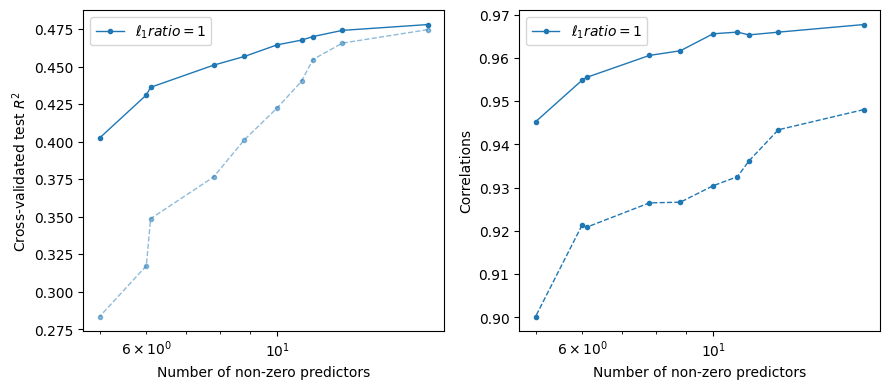

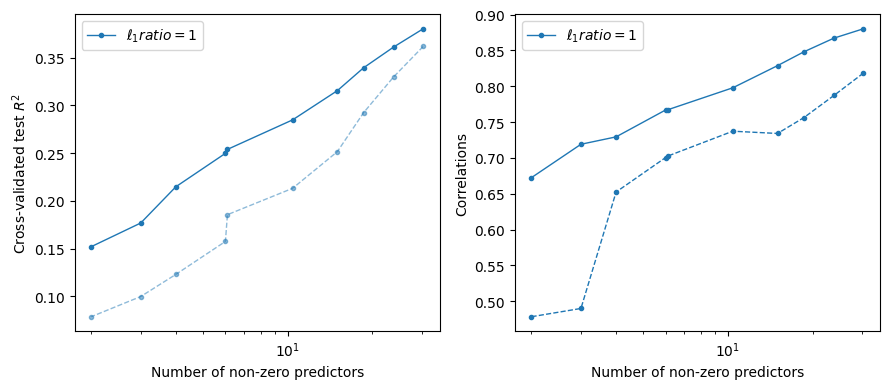

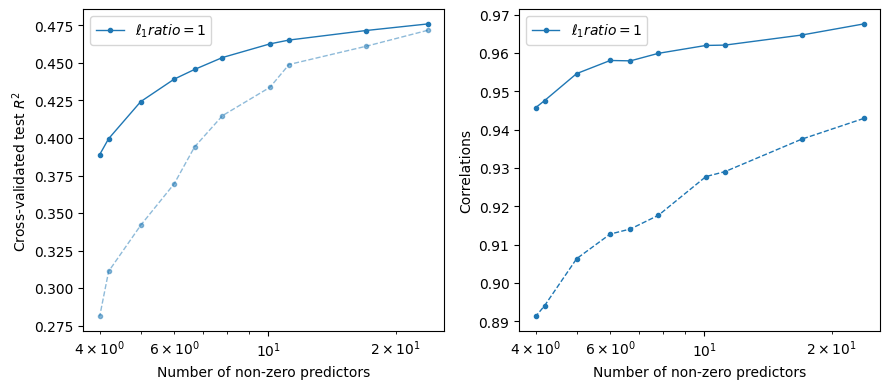

In [42]:
for i, (model, cvResults) in enumerate(zip(['Linear', 'Nonlinear', 'Full'], cvResults_across_datasets)):
    print('Model: ', model)
    plot_cv_results(*cvResults, l1_ratios)

In [44]:
neurons_selected = []
reg_params = [.54, .516, .4] # regularization strength to select 10 neurons/predictors with selected features
for i, (model, X) in enumerate(zip(['Linear', 'Nonlinear', 'Full'], [X_linear, X_nonlinear, X_full])):
    print('Model: ', model)

    w,v = relaxed_elastic_rrr(X[slice,:], Y[slice,:], rank=2, alpha=reg_params[i], l1_ratio=1)

    print('Neurons selected: {}'.format(np.sum(w[:,0]!=0)))
    print(cell_names[w[:,0]!=0])

    neurons_selected.append(np.array(cell_names[w[:,0]!=0]))

Model:  Linear
Neurons selected: 10
['MC3808_S2' 'MC3808_S7' 'MC4017_S10' 'MC5003_S1' 'MC5003_S21'
 'MC5003_S25' 'MC5003_S28' 'MC5005_S14' 'MC5005_S5' 'MC6001_S5']
Model:  Nonlinear
Neurons selected: 10
['MC5003_S1' 'MC5003_S30' 'MC5003_S8' 'MC5005_S2' 'MC5005_S6' 'MC5005_S9'
 'MC5006_S2' 'MC6001_S3' 'MC6001_S7' 'MC6002_S2']
Model:  Full
Neurons selected: 10
['MC3808_S7' 'MC3810_S9' 'MC5003_S17' 'MC5003_S21' 'MC5003_S25'
 'MC5003_S28' 'MC5005_S14' 'MC5005_S6' 'MC6001_S13' 'MC6001_S5']


In [45]:
# same neurons selected in nonlinear + linear vs nonlinear
np.intersect1d(neurons_selected[0], neurons_selected[1])

array(['MC5003_S1'], dtype='<U10')

In [46]:
# same neurons selected in nonlinear + linear vs linear
np.intersect1d(neurons_selected[0], neurons_selected[2])

array(['MC3808_S7', 'MC5003_S21', 'MC5003_S25', 'MC5003_S28',
       'MC5005_S14', 'MC6001_S5'], dtype='<U10')

In [48]:
# same neurons selected in nonlinear vs just linear
np.intersect1d(neurons_selected[1], neurons_selected[2])

array(['MC5005_S6'], dtype='<U10')

In [49]:
bootCounts = elastic_rrr_bootstrap(X_linear[slice,:], Y[slice,:], alpha=.54, l1_ratio=1)

args = np.argsort(bootCounts)[::-1]
print('')
for i in range(20):
    print('{:10} {:.2f}'.format(cell_names[args[i]], bootCounts[args[i]]))

.................................................................................................... 

MC5003_S25 1.00
MC5003_S1  1.00
MC5005_S5  1.00
MC6001_S5  1.00
MC3808_S7  1.00
MC5003_S28 1.00
MC5005_S14 1.00
MC5003_S21 0.95
MC4017_S10 0.88
MC3808_S2  0.55
MC5003_S15 0.00
MC5003_S16 0.00
MC5003_S17 0.00
MC5003_S18 0.00
MC5003_S19 0.00
MC6002_S3  0.00
MC5003_S23 0.00
MC5003_S10 0.00
MC5003_S26 0.00
MC5003_S27 0.00


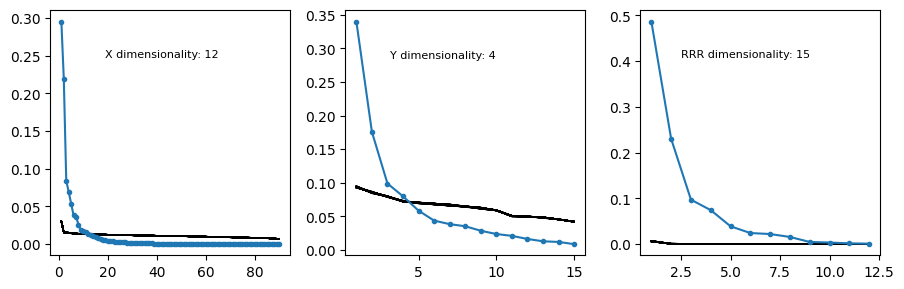

In [51]:
# A quick and dirty way to estimate the dimensionality
dimensionality(X_full[slice,:], Y[slice,:])